# Popular Data Science Questions


Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

# 1. Introduction

You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

Since you're passionate about helping people learn, you decide to scower the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

# 2. Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Here's a sample of the most popular sites:

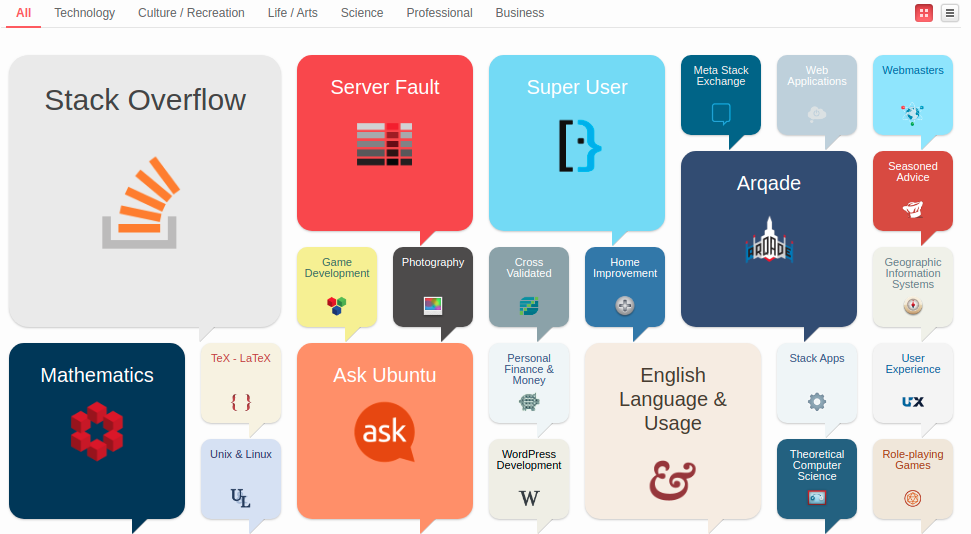

In [1]:
from IPython.display import Image
Image(filename='se_sites.png')

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated — a statistics site](https://stats.stackexchange.com/)
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/)

What kind of questions are welcome on this site?
On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

* [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
* [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)
What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:

* [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
* [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);

* [Users](https://datascience.stackexchange.com/users) — a list of users;
* [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

* For both questions and answers:
  * The posts's score;
  * The posts's title;
  * The posts's author;
  * The posts's body;
* For questions only:
  * How many users have it on their "
  * The last time the question as active;
  * How many times the question was viewed;
  * Related questions;
  * The question's tags;

# 3. Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for our goal:

* Posts
* PostTags
* Tags
* TagSynonyms

Now comes the challenge of accessing the data en masse. One potential solution would be to scrape the site. However, because we still haven't learned how to web scrape, and because we have an easier alternative (mostly the second reason), we're going to do something else.

Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new)'s a link to query and explore Data Science Stack Exchange's database.

You can read more about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on [this](https://data.stackexchange.com/tutorial) tutorial link.

`Note that SEDE uses a different dialect (Transact-SQL — Microsoft's SQL) than SQLite` , which you learned earlier. Most things are the same, but some are different. 

# 4. Getting the Data

To get the relevant data we run the following query.

`SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;`

# 5. Exploring the Data

In [2]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8115 entries, 0 to 8114
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8115 non-null   int64         
 1   CreationDate   8115 non-null   datetime64[ns]
 2   Score          8115 non-null   int64         
 3   ViewCount      8115 non-null   int64         
 4   Tags           8115 non-null   object        
 5   AnswerCount    8115 non-null   int64         
 6   FavoriteCount  1513 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 443.9+ KB



We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [5]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)


We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

# 6. Cleaning the Data

In [6]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [7]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
4411,51941,2019-05-14 11:04:52,1,20,"[decision-trees, cost-function]",1,0
7850,53878,2019-06-16 01:28:20,1,35,"[machine-learning, recommender-system]",1,0
2858,58842,2019-09-07 21:08:05,1,61,[decision-trees],0,0


# 7. Most Used and Most Viewed

In [8]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For improved aesthetics, let's transform tag_count in a dataframe.

In [9]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
python,1679
pandas,341
predictive-modeling,250
data,195
random-forest,147
categorical-data,77
pca,82
machine-learning,2499
word-embeddings,112
convolution,91


Let's now sort this dataframe by Count and visualize the top 20 results.

In [10]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,209
statistics,214
clustering,250
predictive-modeling,250
r,252
dataset,308
regression,321
pandas,341
lstm,355
time-series,419


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

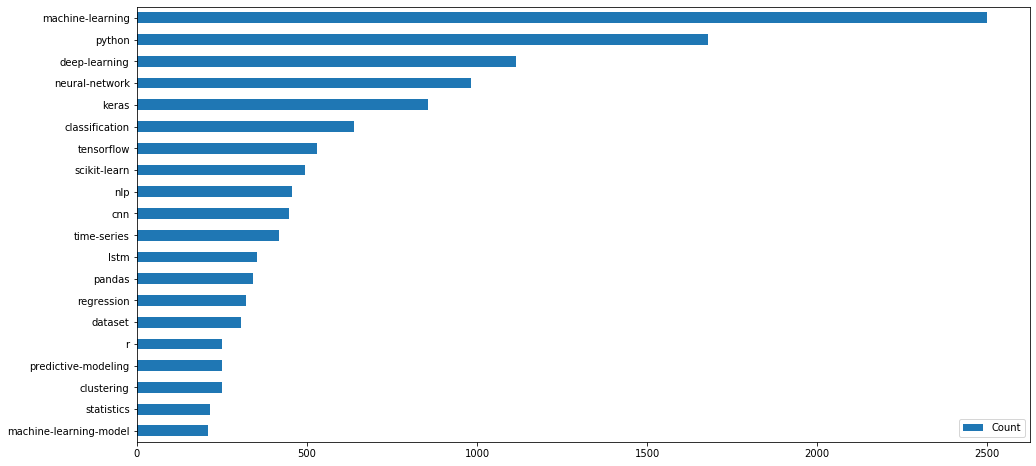

In [11]:
most_used.plot(kind="barh", figsize=(16,8))


Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use pandas's pandas.DataFrame.iterrows().

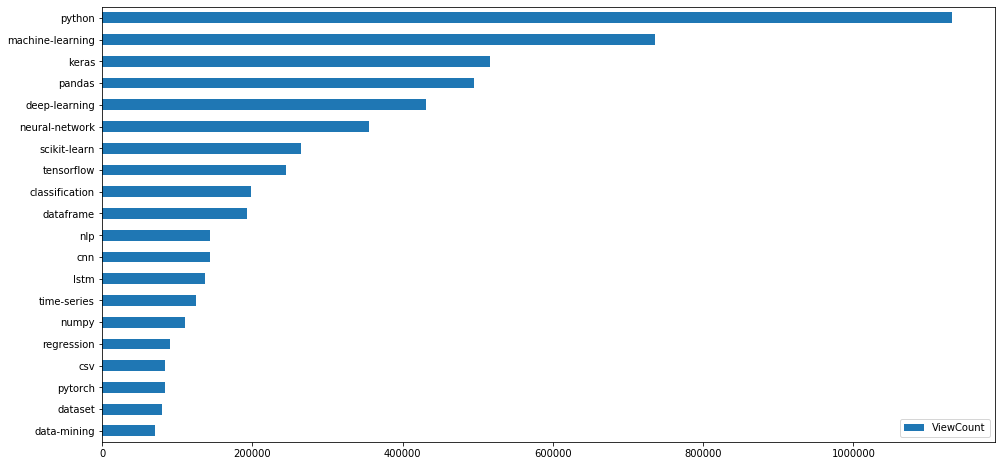

In [12]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC215EF7C8>],
      dtype=object)

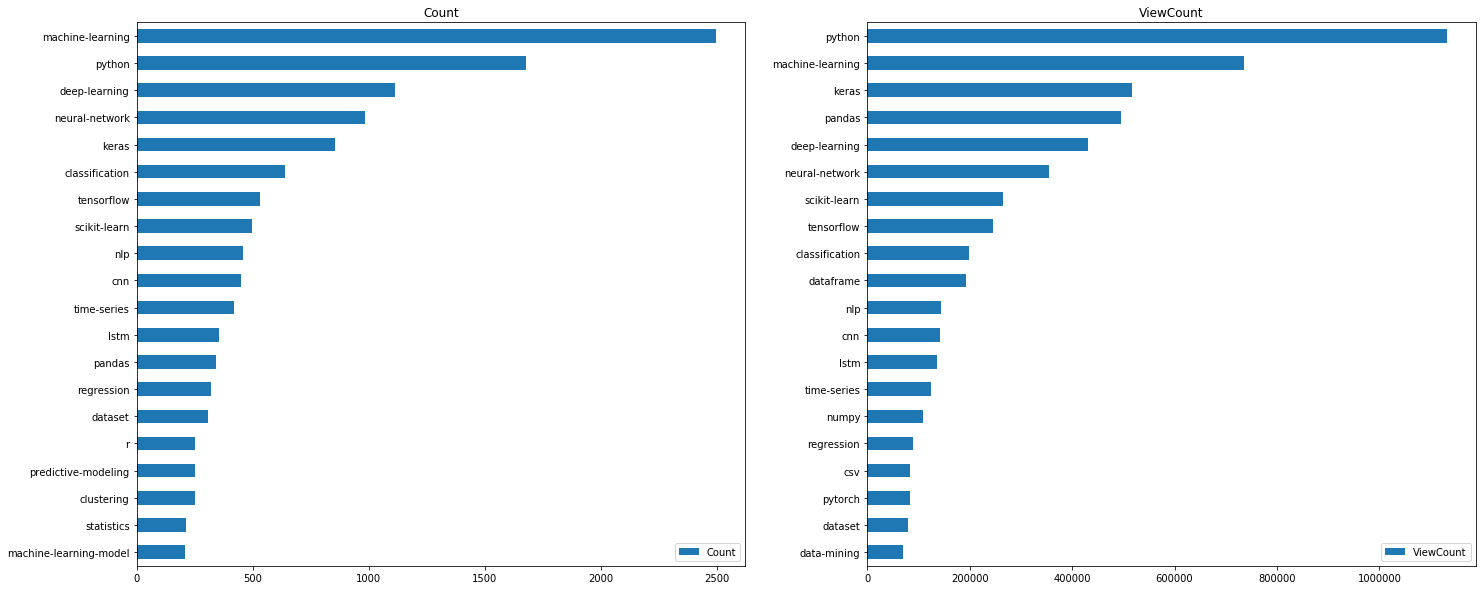

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [14]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

# 8. Relations Between Tags


One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [15]:
all_tags = list(tag_count.index)

In [16]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,python,pandas,predictive-modeling,data
python,NaN,NaN,NaN,NaN
pandas,NaN,NaN,NaN,NaN
predictive-modeling,NaN,NaN,NaN,NaN
data,NaN,NaN,NaN,NaN



We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [17]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [18]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,209,3,3,20,7,11,8,3,5,6,3,4,17,8,21,14,10,17,35,131
statistics,3,214,3,14,15,15,14,2,1,19,1,3,5,0,16,2,10,11,33,86
clustering,3,3,250,0,16,5,2,5,3,19,0,9,22,0,12,0,6,2,45,59
predictive-modeling,20,14,0,250,11,7,25,4,12,27,6,0,12,6,26,11,13,31,35,119
r,7,15,16,11,252,6,8,2,3,22,2,3,1,1,9,10,9,5,23,58
dataset,11,15,5,7,6,308,5,10,5,6,10,10,6,8,24,9,19,27,50,93
regression,8,14,2,25,8,5,321,6,11,22,5,2,37,9,31,31,42,21,57,114
pandas,3,2,5,4,2,10,6,341,7,19,1,3,36,3,3,3,1,1,235,60
lstm,5,1,3,12,3,5,11,7,355,76,21,17,1,32,15,116,60,94,54,57
time-series,6,19,19,27,22,6,22,19,76,419,7,0,10,9,22,44,31,39,93,120



The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [19]:
import numpy as np
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

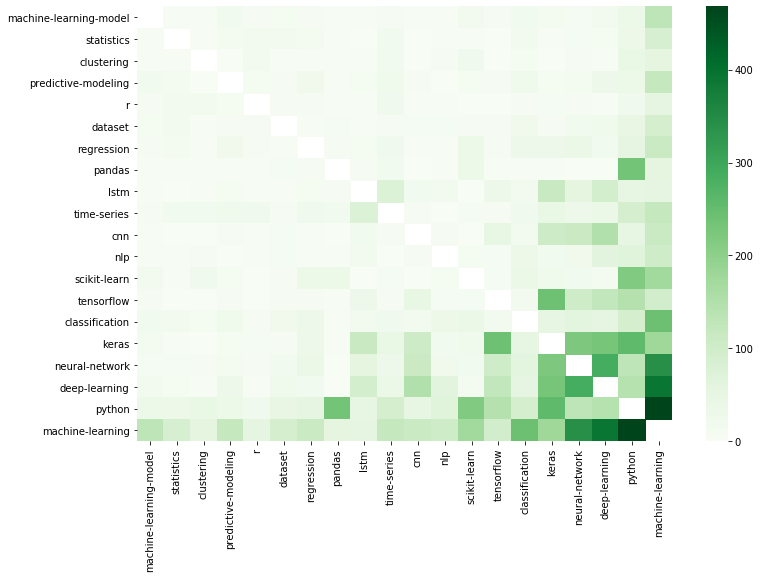

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)


The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about [statistical independence](https://en.wikipedia.org/wiki/Independence_(probability_theory)) in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

# 9.Enter Domain Knowledge

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# 10.Just a Fad?
Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

`SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;`
 
 Run this query to get all_questions.csv on SEDE

In [21]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])


We can use the same technique as before to clean the tags column.

In [22]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [23]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [24]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [25]:
all_q.sample(5)


,Id,CreationDate,Tags,DeepLearning
19710,74868,2020-05-26 10:30:50,"[dataset, feature-scaling, definitions]",0
22721,53809,2019-06-14 16:45:21,[sequence-to-sequence],0
21018,31201,2018-05-04 07:02:07,"[python, deep-learning, nlp, keras, text-mining]",1
4564,745,2014-07-16 00:06:02,"[machine-learning, python]",0
20850,44202,2019-01-18 14:09:33,[text-mining],0



Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [26]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [27]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [28]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,17555,2017-03-13 14:03:10,[python],0,17Q1
1,17557,2017-03-13 14:07:24,"[deep-learning, tensorflow, keras, word-embedd...",1,17Q1
2,17559,2017-03-13 17:27:14,"[tensorflow, gpu]",1,17Q1
3,17561,2017-03-13 18:38:15,"[python, classification, time-series]",0,17Q1
4,17565,2017-03-13 20:46:57,"[python, logistic-regression]",0,17Q1



For the final stretch of this screen, we'll group by quarter and:

Count the number of deep learning questions.

Count the total number of questions.

Compute the ratio between the two numbers above.

In [29]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
20,19Q2,745,1956,0.380879
4,15Q2,28,284,0.098592
12,17Q2,225,645,0.348837
5,15Q3,45,311,0.144695
15,18Q1,554,1219,0.454471


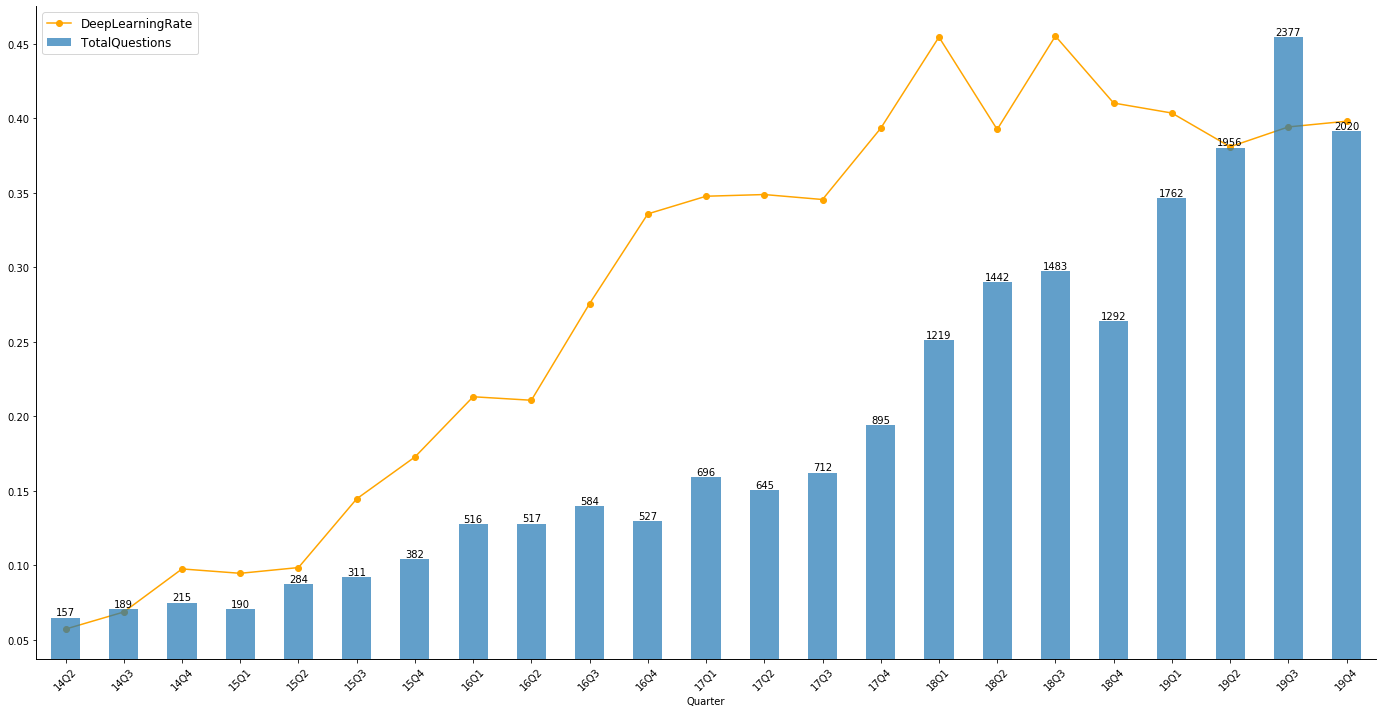

In [30]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.